# Section 4 - PCA
You do not need any accompanying datasets for this notebook.

Goals:
- practice pandas
- make interpretation from plots
- solidify linear regression
- understand SVD better

# 1 Loading data from internet/preprocessing
**Task:**
- Read the description of the [diabetes](https://www4.stat.ncsu.edu/~boos/var.select/diabetes) dataset. 
- Using [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), load the dataset into a DataFrame `df` from the URL https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt. 
    - This dataset is tab separated, so make sure you use the read_csv function's sep argument correctly with '\t'.
- Display the dataframe.

In [1]:
# TODO import data
import pandas as pd

# sep='\t' indicates that tab is the character separating values.
df = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep='\t')
display(df)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


We will analyze the data for individuals with
1. `20 <= AGE < 30`
2. `SEX == 1`

**Task:** 
- Store this subset of data (with above two criteria) as `subdata`. 
    - After filtering the above criteria, drop the `AGE` and `SEX` columns from the data. 
    - Display `subdata` to check you did the right thing.
- Define numpy array `y` by choosing the corresponding column of `subdata`.
- Define numpy array `X` by choosing the remaining columns of `subdata`. 
    - Hence, your predictors/features are `BMI`, `BP`, `S1`, `S2`, `S3`, `S4`, `S5`, and `S6`. (Remember: we already dropped `SEX` and `AGE`)
    - Make sure the dimensions are number of features by number of data points. You may need to take a transpose.
- Check if you did the correct thing by printing any relevatn quantities, like shapes or array entries.

In [2]:
# TODO create subdata, y, and X
subdata = df[(df["AGE"] >= 20) & (df["AGE"] < 30) & (df["SEX"] == 1)]
display(subdata) # display to check
subdata = subdata.drop(columns=["AGE", "SEX"])
display(subdata)

y = subdata["Y"].to_numpy()
print(y.shape)
X = subdata.drop(columns="Y").to_numpy().T
print(X.shape)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
5,23,1,22.6,89.00,139,64.8,61.0,2.00,4.1897,68,97
9,29,1,30.0,85.00,180,93.4,43.0,4.00,5.3845,88,310
10,22,1,18.6,97.00,114,57.6,46.0,2.00,3.9512,83,101
22,25,1,26.0,92.00,187,120.4,56.0,3.00,3.9703,88,68
41,21,1,20.1,63.00,135,69.0,54.0,3.00,4.0943,89,55
47,27,1,19.6,78.00,128,68.0,43.0,3.00,4.4427,71,142
60,29,1,26.0,83.00,141,65.2,64.0,2.00,4.0775,83,61
77,22,1,23.0,73.00,161,97.8,54.0,3.00,3.8286,91,200
79,20,1,22.9,87.00,191,128.2,53.0,4.00,3.8918,85,113


,BMI,BP,S1,S2,S3,S4,S5,S6,Y
3,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
5,22.6,89.00,139,64.8,61.0,2.00,4.1897,68,97
9,30.0,85.00,180,93.4,43.0,4.00,5.3845,88,310
10,18.6,97.00,114,57.6,46.0,2.00,3.9512,83,101
22,26.0,92.00,187,120.4,56.0,3.00,3.9703,88,68
41,20.1,63.00,135,69.0,54.0,3.00,4.0943,89,55
47,19.6,78.00,128,68.0,43.0,3.00,4.4427,71,142
60,26.0,83.00,141,65.2,64.0,2.00,4.0775,83,61
77,23.0,73.00,161,97.8,54.0,3.00,3.8286,91,200
79,22.9,87.00,191,128.2,53.0,4.00,3.8918,85,113


(27,)
(8, 27)


# 2 Covariance matrix 

**Task:**
- Discuss: What is one important step you must do to the data before calculating covariance matrix for PCA?

    **Ans:** Center the data by the mean of each feature/dimension.

- Perform that change on the data X above, store the centered data as `X_ctd`. 
- Then, compute the new covariance matrix `C` of the data `X_ctd` using the formula
    $$
    C = \frac{1}{n\!-\!1}\ X X^T.
    $$
    - Check the dimensions of the covariance matrix is correct.
- Perform an eigendecomposition, using singular value decomposition.

In [3]:
# TODO compute covariance matrix
import numpy as np

n = X.shape[1]
X_ctd = X - X.mean(axis=1, keepdims=True)
C = X_ctd @ X_ctd.T / (n - 1)
C.shape

# TODO eigendecomposition
U, D, W = np.linalg.svd(C)

# 3 Compare eigendecompositions
**Task:**
- Compute the eigen decomposition of the covariance matrix THREE different ways: `svd()`, `eig()`, `eigh()`. 
    - For each way, print the eigenvalues/singular values.
- Disucss:
    - What's the difference between `svd` and `eig`? How many different outputs are there?
    - What's the difference between `eig` and `eigh`? What property of covariance matrices allows us to use `eigh`?
    - What is the difference between the eigenvalue/singular value outputs? How are they sorted? Print them and check.

In [4]:
# TODO SVD
U, D, W = np.linalg.svd(C)
D

array([1.47690407e+03, 1.10802577e+02, 6.44404206e+01, 4.03704105e+01,
       1.73158735e+01, 5.68894904e+00, 5.73229400e-02, 9.65230624e-03])

In [5]:
# TODO EIG
eval, U = np.linalg.eig(C)
eval

array([1.47690407e+03, 1.10802577e+02, 6.44404206e+01, 4.03704105e+01,
       1.73158735e+01, 5.68894904e+00, 5.73229400e-02, 9.65230624e-03])

In [6]:
# TODO EIGH
eval, U = np.linalg.eigh(C)
eval

array([9.65230624e-03, 5.73229400e-02, 5.68894904e+00, 1.73158735e+01,
       4.03704105e+01, 6.44404206e+01, 1.10802577e+02, 1.47690407e+03])

# sklearn PCA
**Task:**
Compare your manual implementation against sklearn.

In [7]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = X_ctd.shape[0])
pca.fit(X_ctd.T) # Note the tranpose for sklearn

# TODO compare eigenvalues
print(np.round(pca.explained_variance_,3))
print(np.round(D,3))


[1.476904e+03 1.108030e+02 6.444000e+01 4.037000e+01 1.731600e+01
 5.689000e+00 5.700000e-02 1.000000e-02]
[1.476904e+03 1.108030e+02 6.444000e+01 4.037000e+01 1.731600e+01
 5.689000e+00 5.700000e-02 1.000000e-02]


In [8]:
# TODO compare eigenvectors
print(np.round(pca.components_.T,3))
print(np.round(U,3))

[[-0.065 -0.039  0.154 -0.259  0.317  0.896  0.009  0.003]
 [-0.082  0.091  0.978  0.067  0.01  -0.155 -0.015 -0.   ]
 [-0.727  0.295 -0.12  -0.19   0.515 -0.256  0.032  0.045]
 [-0.676 -0.304 -0.008  0.3   -0.556  0.222 -0.01  -0.047]
 [-0.022  0.731 -0.021 -0.396 -0.537  0.11  -0.072 -0.04 ]
 [-0.013 -0.039 -0.015  0.021  0.055 -0.004 -0.989  0.131]
 [-0.002 -0.006 -0.006 -0.003  0.08  -0.024 -0.126 -0.988]
 [-0.056 -0.524  0.067 -0.803 -0.165 -0.213 -0.005 -0.002]]
[[ 0.003  0.009  0.896 -0.317 -0.259 -0.154 -0.039 -0.065]
 [-0.    -0.015 -0.155 -0.01   0.067 -0.978  0.091 -0.082]
 [ 0.045  0.032 -0.256 -0.515 -0.19   0.12   0.295 -0.727]
 [-0.047 -0.01   0.222  0.556  0.3    0.008 -0.304 -0.676]
 [-0.04  -0.072  0.11   0.537 -0.396  0.021  0.731 -0.022]
 [ 0.131 -0.989 -0.004 -0.055  0.021  0.015 -0.039 -0.013]
 [-0.988 -0.126 -0.024 -0.08  -0.003  0.006 -0.006 -0.002]
 [-0.002 -0.005 -0.213  0.165 -0.803 -0.067 -0.524 -0.056]]


# 5 Projection
For simplicity, consider a further subdata in 2D using only the `BMI` and `BP` columns, centered. The code has been written for you.

**Task:**
Read and understand every line of code below.

**Discuss:** Let $U_1$ be the first column of $U$, hence, the first principal component. Why does the formula 
$$
U_1 U_1^T Z
$$
give the projection of the data on the first principal component?  
(Hint: Break it down into steps. First, what are the dimensions of $U_1^T Z$ and what does each entry mean? Second, what does multiplying it further by $U_1$ do?)

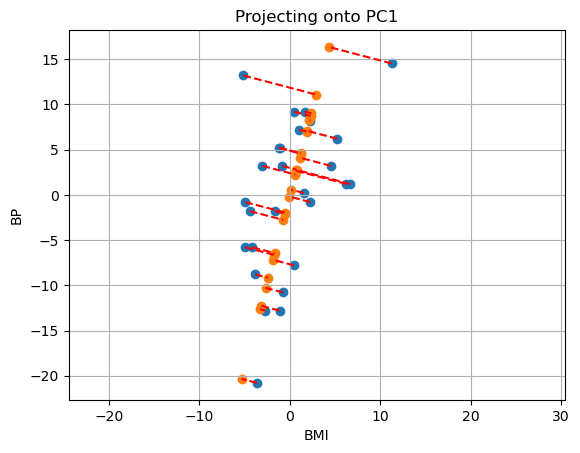

In [9]:
n = X.shape[1]

Z = X[:2,:]                                 # keep first two rows for BMI and BP only
Z -= Z.mean(axis=1, keepdims=True)          # center

U, V, W = np.linalg.svd(Z @ Z.T / (n-1))    # svd
P1 = U[:,:1] @ U[:,:1].T @ Z                # project onto 1st PC

import matplotlib.pyplot as plt
plt.scatter(Z[0,:], Z[1,:])
plt.scatter(P1[0,:], P1[1,:])
plt.plot(np.vstack((Z[0,:], P1[0,:])), np.vstack((Z[1,:], P1[1,:])), '--r')
plt.xlabel('BMI'); plt.ylabel('BP'); plt.title('Projecting onto PC1')
plt.axis('equal'); plt.grid(); plt.show()